# Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set(style="whitegrid")

# Read and display a snapshot ofour dataset

# Read and display a snapshot ofour dataset

In [4]:
# Load the dataset
df = pd.read_csv('Data/Expanded_Remote_Workers_Data1.csv')

# Display the first few rows of the dataset
df.head(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,None,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,None,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


# Lets check for missing values and data types

In [5]:
df.info()
df.describe()
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        6000 non-null   object
 1   Age                                6000 non-null   int64 
 2   Gender                             6000 non-null   object
 3   Job_Role                           6000 non-null   object
 4   Industry                           6000 non-null   object
 5   Years_of_Experience                6000 non-null   int64 
 6   Work_Location                      6000 non-null   object
 7   Hours_Worked_Per_Week              6000 non-null   int64 
 8   Number_of_Virtual_Meetings         6000 non-null   int64 
 9   Work_Life_Balance_Rating           6000 non-null   int64 
 10  Stress_Level                       6000 non-null   object
 11  Mental_Health_Condition            4804 non-null   object
 12  Access

Mental_Health_Condition    1196
dtype: int64

# Further data cleaning

In [6]:
df.drop_duplicates(inplace=True)


# Some data visualizations

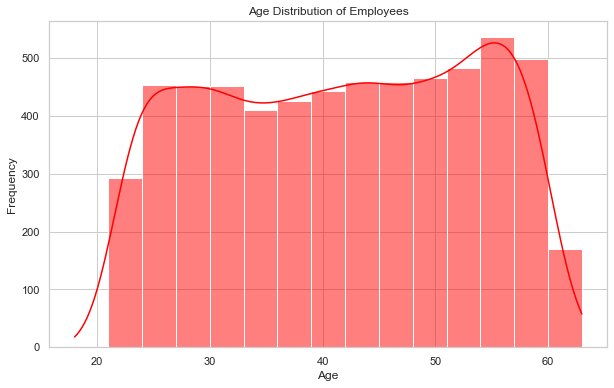

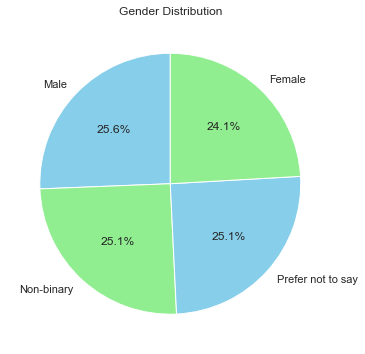

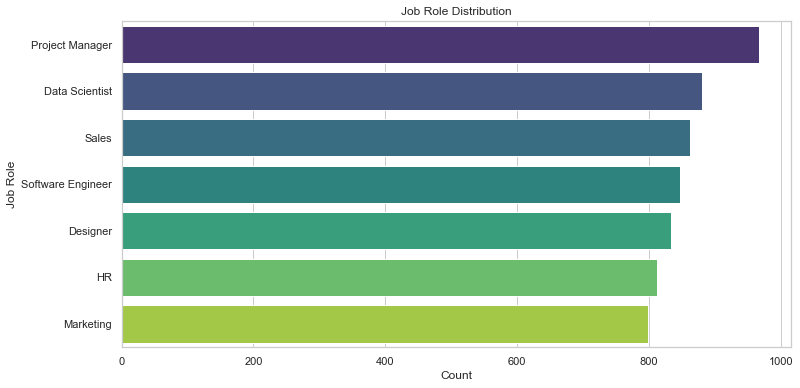

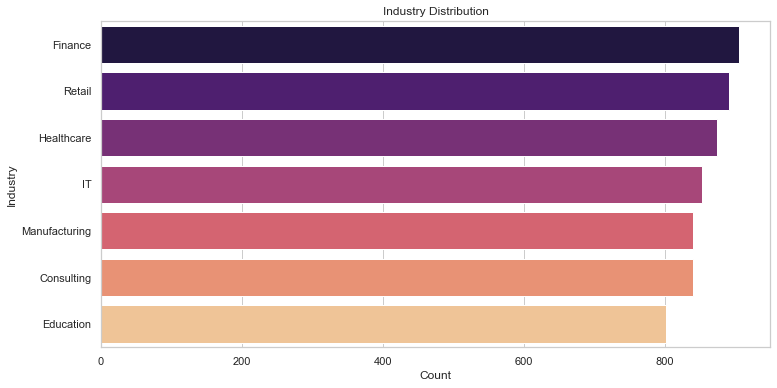

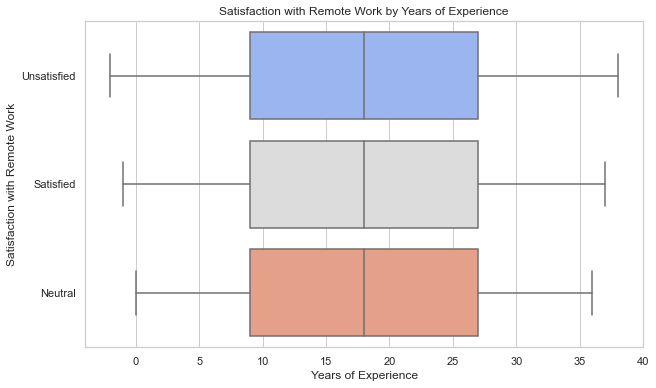

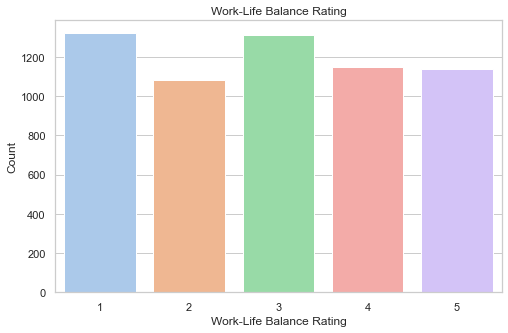

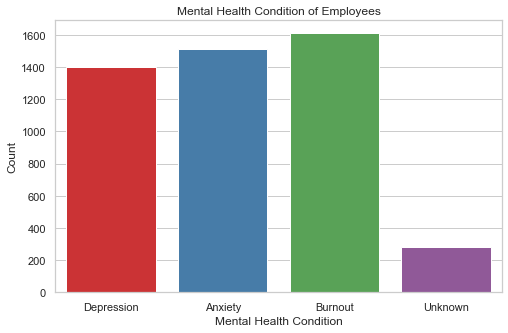

In [7]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='red')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()

# Job role distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Job_Role', order=df['Job_Role'].value_counts().index, palette='viridis')
plt.title('Job Role Distribution')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

# Industry distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='magma')
plt.title('Industry Distribution')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

# Boxplot for Years of Experience vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Years_of_Experience', y='Satisfaction_with_Remote_Work', palette='coolwarm')
plt.title('Satisfaction with Remote Work by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Satisfaction with Remote Work')
plt.show()

# Countplot for Work-Life Balance Rating
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Work_Life_Balance_Rating', palette='pastel')
plt.title('Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

# Countplot for Mental Health Condition
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Mental_Health_Condition', palette='Set1')
plt.title('Mental Health Condition of Employees')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

### Data seems to be relatively uniform and evenly distributed along the major x vars and y we anticipate on predicting. Let's move forwards with creating some training and testing splits to build our predictive model.

# Convert categorical vars and split data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


df = df[(df['Work_Location'] == 'Remote')]

# Handle missing values
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('None')
df['Physical_Activity'] = df['Physical_Activity'].fillna('Unknown')

# Encode the target variable
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].apply(lambda x: 1 if x in ['Anxiety', 'Depression', 'Burnout'] else 0)

# Drop unnecessary columns
df = df.drop(['Work_Location', 'Gender', 'Employee_ID'], axis=1)

# Scale numeric features
numeric_features = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# One-hot encode selected categorical features
categorical_features = ['Stress_Level', 'Sleep_Quality', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Job_Role', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Industry', 'Region']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define features and target
X = df_encoded.drop('Mental_Health_Condition', axis=1)
y = df_encoded['Mental_Health_Condition']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for balancing the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



# Shape of the splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (2171, 35)
Validation set shape: (543, 35)


# Support Vector Machine Model

Accuracy on validation set: 0.6593001841620626

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.18      0.21       130
           1       0.76      0.81      0.78       413

    accuracy                           0.66       543
   macro avg       0.50      0.50      0.49       543
weighted avg       0.63      0.66      0.64       543

Accuracy: 0.6593001841620626
Precision: 0.759090909090909
Recall: 0.8087167070217918


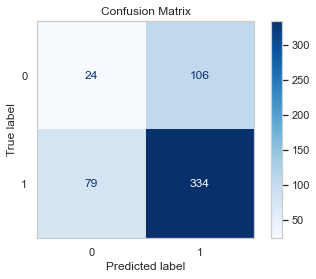

                                      Feature    Weight
27                                Industry_IT  1.261602
28                     Industry_Manufacturing  1.200641
24                         Industry_Education  1.160503
32                       Region_North America  1.069263
30                                Region_Asia  1.057456
29                            Industry_Retail  1.046550
31                              Region_Europe  1.036704
34                       Region_South America  1.030977
25                           Industry_Finance  1.007229
15                                Job_Role_HR  0.994309
26                        Industry_Healthcare  0.926944
33                             Region_Oceania  0.908110
14                          Job_Role_Designer  0.848002
18                             Job_Role_Sales  0.845664
17                   Job_Role_Project Manager  0.784145
19                 Job_Role_Software Engineer  0.780693
16                         Job_Role_Marketing  0

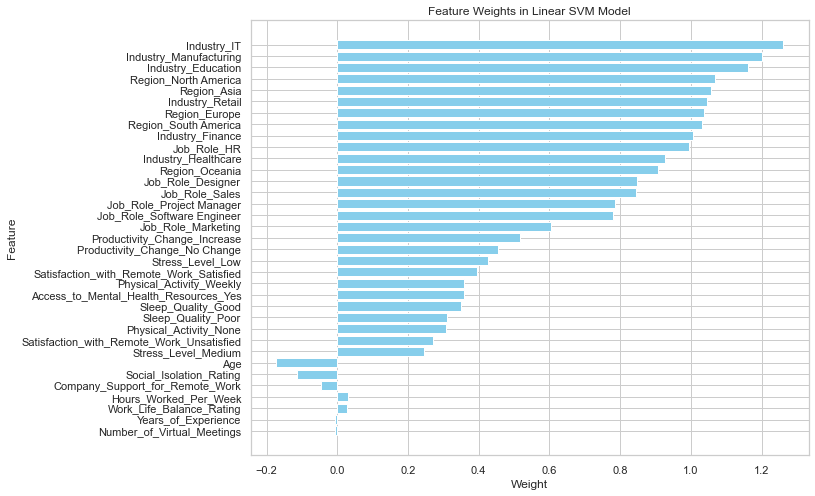

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize the SVM model with custom class weights
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train the SVM model on the SMOTE-resampled data
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions on the validation set
y_pred_binary = svm_model.predict(X_val)

# Evaluate the model
print("Accuracy on validation set:", accuracy_score(y_val, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_val, y_pred_binary))

# Calculate and print metrics
print("Accuracy:", accuracy_score(y_val, y_pred_binary))
print("Precision:", precision_score(y_val, y_pred_binary))
print("Recall:", recall_score(y_val, y_pred_binary))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])

# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the confusion matrix on the specified axes
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Disable grid lines
ax.grid(False)

# Set the title
ax.set_title("Confusion Matrix")

# Display the plot
plt.show()

# Set up feature weights graph using absolute values
feature_weights = svm_model.coef_.flatten()

feature_names = X_train_smote.columns.tolist()

# Create a DataFrame to hold feature names and their corresponding weights
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': feature_weights
})

# Sum the absolute values of weights to get overall importance
feature_importance_df['Absolute_Weight'] = feature_importance_df['Weight'].abs()

# Sort features by absolute weight
sorted_features = feature_importance_df.sort_values(by='Absolute_Weight', ascending=False)

# Plotting top 10 important features
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_features['Absolute_Weight'].head(10), y=sorted_features['Feature'].head(10), color='skyblue')
plt.title('Top 10 Important Features in Linear SVM Model')
plt.xlabel('Feature Importance (Absolute Weight)')
plt.ylabel('Features')
plt.show()